In [3]:
import os
import tensorflow as tf
import numpy as np

In [1]:
new_saved = ["milk", "coffee", "door", "dog"]

In [23]:
X_val = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_val.npy")
y_val = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_val.npy")
X_val.shape, y_val.shape

((299, 256, 256, 3), (299,))

In [20]:
X_train = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_train.npy")
y_train = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_train.npy")
X_train.shape, y_train.shape

((2484, 256, 256, 3), (2484,))

milk
coffee
door
dog


In [21]:
X_test = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_test.npy")
y_test = np.load("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_test.npy")
X_test.shape, y_test.shape

((297, 256, 256, 3), (297,))

In [24]:
#shuffle train data
import sklearn
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train, y_train

(array([[[[-0.23137255, -0.23137255, -0.1764706 ],
          [-0.10588235, -0.10588235, -0.05098039],
          [-0.11372549, -0.11372549, -0.05882353],
          ...,
          [-0.14509805, -0.10588235, -0.01960784],
          [-0.12941177, -0.09019608, -0.00392157],
          [-0.27058825, -0.23137255, -0.14509805]],
 
         [[-0.04313726, -0.04313726,  0.01176471],
          [ 0.12156863,  0.12156863,  0.1764706 ],
          [ 0.12156863,  0.12156863,  0.1764706 ],
          ...,
          [ 0.11372549,  0.15294118,  0.23921569],
          [ 0.09803922,  0.13725491,  0.22352941],
          [-0.06666667, -0.03529412,  0.05882353]],
 
         [[-0.09803922, -0.09803922, -0.04313726],
          [ 0.10588235,  0.10588235,  0.16078432],
          [ 0.08235294,  0.08235294,  0.13725491],
          ...,
          [ 0.10588235,  0.14509805,  0.23137255],
          [ 0.07450981,  0.11372549,  0.2       ],
          [-0.01176471,  0.02745098,  0.11372549]],
 
         ...,
 
         [[-

In [25]:
#shuffle val and test data
import sklearn
from sklearn.utils import shuffle
X_val, y_val = shuffle(X_val, y_val, random_state=42)

X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_test, y_test

(array([[[[-0.06666667,  0.05098039,  0.13725491],
          [-0.07450981,  0.05098039,  0.13725491],
          [-0.05882353,  0.04313726,  0.13725491],
          ...,
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ]],
 
         [[-0.06666667,  0.05098039,  0.13725491],
          [-0.07450981,  0.05098039,  0.13725491],
          [-0.05882353,  0.04313726,  0.13725491],
          ...,
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ]],
 
         [[-0.06666667,  0.05098039,  0.13725491],
          [-0.07450981,  0.05098039,  0.13725491],
          [-0.05882353,  0.04313726,  0.13725491],
          ...,
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ],
          [ 0.09803922,  0.23137255,  0.3019608 ]],
 
         ...,
 
         [[-

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', input_shape=(256, 256, 3), include_top=False)
vgg_model.trainable = False
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [27]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

x = vgg_model.get_layer('block5_pool').output
x = Flatten(name='flatten')(x)
x = Dense(40, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

vgg_model = Model(vgg_model.input, output)

In [28]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/four_var/four_var_models/four_var_weights.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [29]:
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [37]:
history = vgg_model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/30
50/50 [==============================] - 71s 1s/step - loss: 9.0824e-05 - accuracy: 1.0000 - val_loss: 2.6235 - val_accuracy: 0.5920
Epoch 2/30
50/50 [==============================] - 70s 1s/step - loss: 7.0538e-05 - accuracy: 1.0000 - val_loss: 2.6412 - val_accuracy: 0.5886
Epoch 3/30
50/50 [==============================] - 68s 1s/step - loss: 8.0998e-05 - accuracy: 1.0000 - val_loss: 2.6662 - val_accuracy: 0.5786
Epoch 4/30
50/50 [==============================] - 65s 1s/step - loss: 9.1567e-05 - accuracy: 1.0000 - val_loss: 2.6803 - val_accuracy: 0.5786
Epoch 5/30
50/50 [==============================] - 67s 1s/step - loss: 7.7423e-05 - accuracy: 1.0000 - val_loss: 2.6861 - val_accuracy: 0.5920
Epoch 6/30
50/50 [==============================] - 65s 1s/step - loss: 7.1959e-05 - accuracy: 1.0000 - val_loss: 2.7579 - val_accuracy: 0.5619
Epoch 7/30
50/50 [==============================] - 64s 1s/step - loss: 4.8077e-05 - accuracy: 1.0000 - val_loss: 2.7207 - val_accuracy:

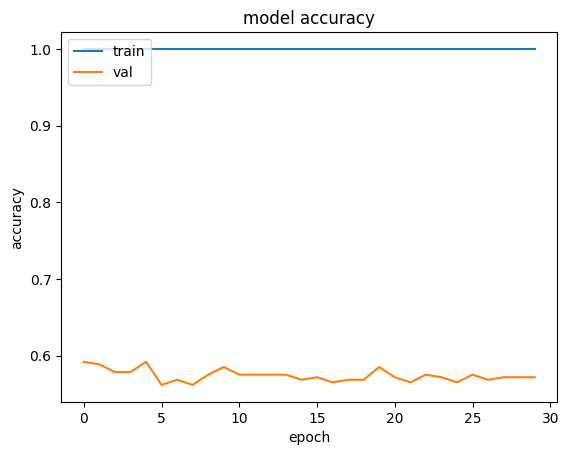

In [38]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

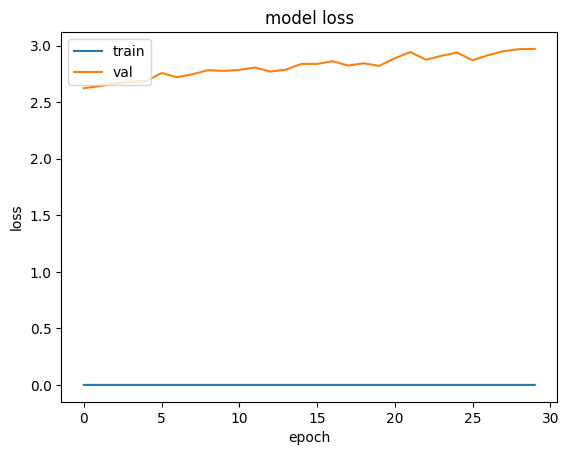

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()